# Data Preprocessing

# Import Libraries

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold , cross_val_score , train_test_split

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Call The Dataset

In [188]:
power = pd.read_csv('PowerPlant.csv')
power.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [189]:
power.shape

(9568, 5)

Info About Dataset

In [190]:
power.shape

(9568, 5)

In [191]:
power.info

<bound method DataFrame.info of          AT      V       AP     RH      PE
0      8.34  40.77  1010.84  90.01  480.48
1     23.64  58.49  1011.40  74.20  445.75
2     29.74  56.90  1007.15  41.91  438.76
3     19.07  49.69  1007.22  76.79  453.09
4     11.80  40.66  1017.13  97.20  464.43
...     ...    ...      ...    ...     ...
9563  15.12  48.92  1011.80  72.93  462.59
9564  33.41  77.95  1010.30  59.72  432.90
9565  15.99  43.34  1014.20  78.66  465.96
9566  17.65  59.87  1018.58  94.65  450.93
9567  23.68  51.30  1011.86  71.24  451.67

[9568 rows x 5 columns]>

In [192]:
print(power.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [193]:
power.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

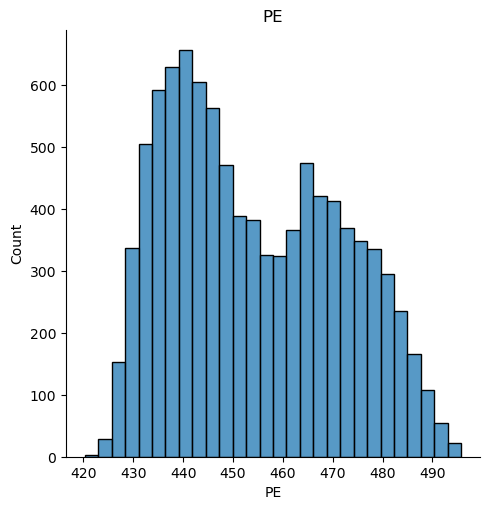

In [194]:
plt.figure(figsize=(6,6))
sns.displot(power['PE'])
plt.title('PE')
plt.show()

# Splitting The dataset into Features & Dependent

In [195]:
X = power.drop(columns='PE' , axis=1).values
y = power['PE'].values
print(X)
print(y)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]
[480.48 445.75 438.76 ... 465.96 450.93 451.67]


# Correlation

<Axes: >

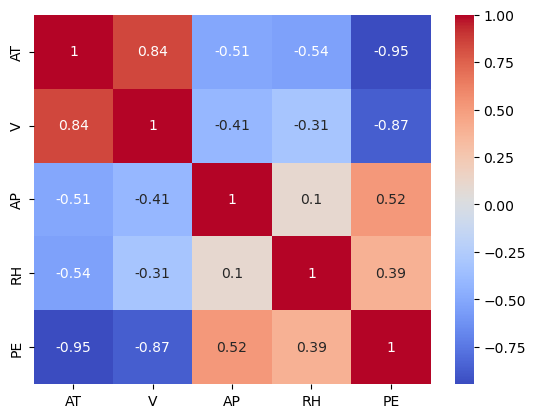

In [196]:
correlation_matrix = power.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')

# Splitting The dataset into X_train, X_test , y_train , y_test

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(7654, 4)
(1914, 4)
(9568, 4)


# Feature Scalling

In [198]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[ 0.74805289  0.72006931 -0.32660017 -0.49711722]
 [ 0.86181948  1.26515721 -0.98521113  0.8181501 ]
 [ 0.93409473  1.52314975  0.32523844  0.80167494]
 ...
 [-0.22097078 -0.834965    0.36756563 -0.83554456]
 [ 0.94747903  1.14245344 -0.41971997 -0.45455637]
 [-1.77355014 -1.19049131  1.92520594  0.91837402]]
[[ 1.36255441  0.24305848 -1.27798491 -1.04586379]
 [ 0.82147733  1.36986442 -0.74695303  0.31071896]
 [-0.247116   -0.73708132  1.92304887 -0.14668594]
 ...
 [-0.67970645 -1.15815506 -0.31652036 -0.05697206]
 [ 1.33136451  1.34463153 -0.87558808 -0.39000089]
 [-0.26474508 -0.26711887  0.33984824  1.14397069]]


# Linear Regression

In [199]:
reg = LinearRegression()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(reg, X, y, cv=k_fold, scoring='r2')
print("Individual Fold R2 Scores:", cross_val_results)
print("Mean R2 Score:", np.mean(cross_val_results))

Individual Fold R2 Scores: [0.93147479 0.92812939 0.92112145 0.93338716 0.92842141]
Mean R2 Score: 0.9285068404231968


In [200]:
reg.fit(X_train, y_train)
y_pred_train_reg = reg.predict(X_train)
train_score = reg.score(X_train, y_train)
print("Train Score:", train_score)

# Fit the model on the testing set
reg.fit(X_test, y_test)
y_pred_test_reg = reg.predict(X_test)
test_score = reg.score(X_test, y_test)
print("Test Score:", test_score)

Train Score: 0.9279951490925766
Test Score: 0.9318753657055358


In [201]:
print(y_pred_test_reg[:3])
print(y_test[:3])

[435.44660956 437.13262196 461.21915639]
[433.27 438.16 458.42]


In [202]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9568, 4)
(7654, 4)
(1914, 4)


In [203]:
score_r2 = metrics.r2_score(y_test , y_pred_test_reg)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9318753657055358


In [204]:
mae = mean_absolute_error(y_test, y_pred_test_reg)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.523682992690864


Text(0, 0.5, 'Predicted PE')

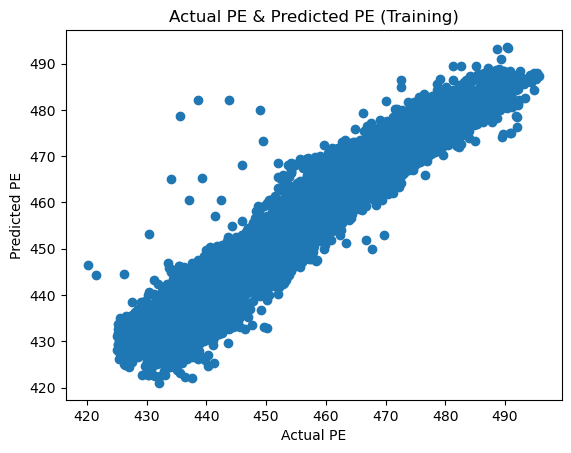

In [206]:
plt.scatter(y_train , y_pred_train_reg)
plt.title("Actual PE & Predicted PE (Training)")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

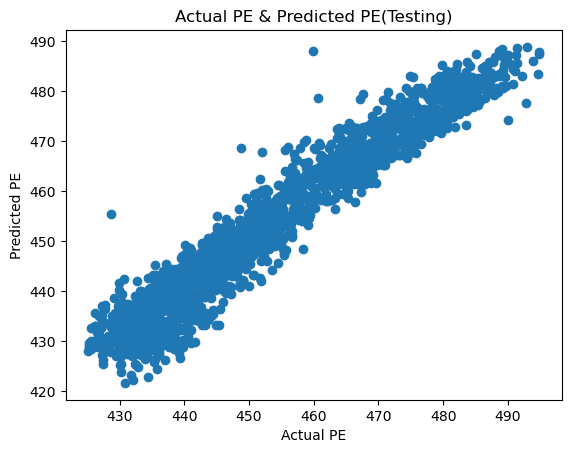

In [207]:
plt.scatter(y_test , y_pred_test_reg)
plt.title("Actual PE & Predicted PE(Testing)")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [208]:
input_data = (5 , 60 , 1007 , 41)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = reg.predict(input_data_reshape)
print('the PE is ' , prediction[0])

the PE is  579.8730798585381


# KNeighborsRegressor

In [209]:
knn = KNeighborsRegressor(n_neighbors = 6)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(knn, X, y, cv=k_fold, scoring='r2')
print("Individual Fold R2 Scores:", cross_val_results)
print("Mean R2 Score:", np.mean(cross_val_results))

Individual Fold R2 Scores: [0.94660634 0.947442   0.94186153 0.94778226 0.945974  ]
Mean R2 Score: 0.9459332276256912


In [ ]:
plt.scatter(y_train , cross_val_results)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [178]:
knn_scaled = knn.fit(X_train , y_train)
y_pred_train_knn = knn_scaled.predict(X_train)
train_score = knn_scaled.score(X_train , y_train)
print("train_score : " , train_score)

knn_scaled.fit(X_test , y_test)
y_pred_test_knn = knn_scaled.predict(X_test)
test_score = knn_scaled.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.9646190623230373
test_score :  0.9563131119185172


In [179]:
print(y_pred_test_knn[:3])
print(y_test[:3])

[436.86833333 436.775      462.845     ]
[433.27 438.16 458.42]


In [180]:
score_r2 = metrics.r2_score(y_test , y_pred_test_knn)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9563131119185172


In [181]:
mae = mean_absolute_error(y_test, y_pred_test_knn)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.705107105538139


Text(0, 0.5, 'Predicted PE')

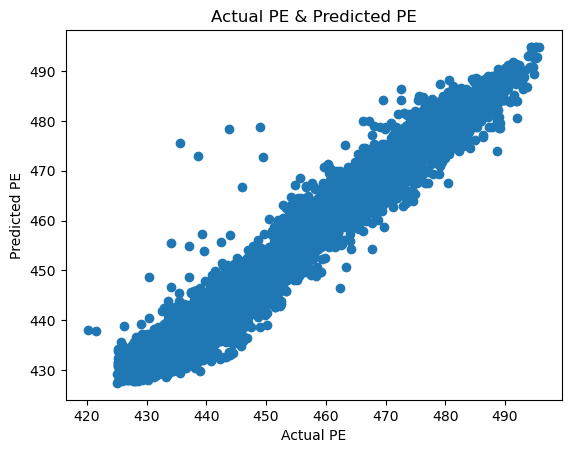

In [182]:
plt.scatter(y_train , y_pred_train_knn)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

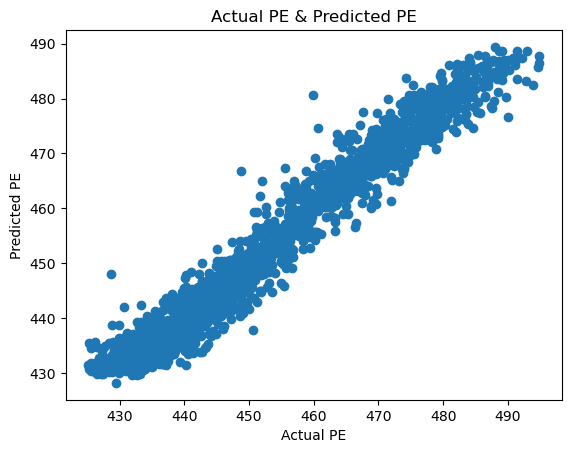

In [183]:
plt.scatter(y_test , y_pred_test_knn)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [184]:
power.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [185]:
input_data = (8,40,1010,90)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = knn_scaled.predict(input_data_reshape)
print('the pe is ' , prediction[0])

the pe is  476.2266666666667


# Histogram

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'V'}>],
       [<Axes: title={'center': 'AP'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'PE'}>, <Axes: >]], dtype=object)

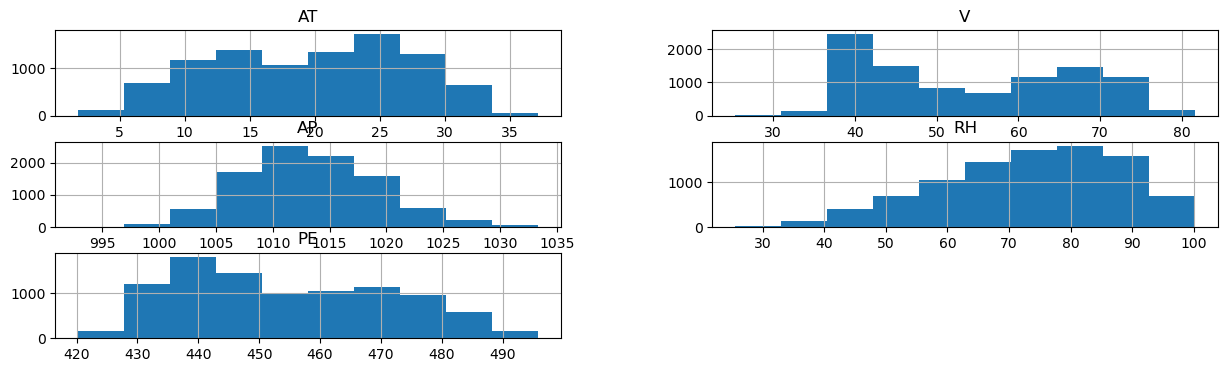

In [186]:
power.hist(figsize=(15,4))